# Analysis and Insights

## Crime Rate and Income Correlation 
* There's a negative correlation between Average Crime Rate and Average Income
* Low Income area has higher crime rate
* R value -> negative relationship.
* p-value<0.005 -> A statistically significant test result
* The stacked bar graph shows Crime Count per neighborhood for each Income Group which depicts lower income regions have higher crime rate per neighborhood.

## Red Light Cameras Analysis
* From the graphs above, we can see that the majority of red light cameras are implemented in regions with an average income of 50-100K. Comparing this with the total number of speeding tickets per income region we see that the same income region holds the most amount of speeding tickets. We can conclude from this that red light cameras are not necessarly placed in low income regions, but more-so regions where speeding is more commonplace.

## House Prices and Crime Rate Correlation
* It seems that there is a very weak negative correlation between  crime rate and house prices.

## Starbucks Locations Analysis
* The Number of Starbucks Stores vs. Average Income scatter plot shows that it seems that there is no correlation between starbucks stores location and income.
* The correlation coefficient is 0.0584, and this shows there is no correlation.

### Other two questions will be answered in Heatmaps Analysis.ipynb

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
final_df = pd.read_csv('Graphs_and_Analysis/Final_Data2.csv')
final_df.drop('Unnamed: 0', axis='columns', inplace=True)

In [3]:
final_df.head()

,Neighbourhood,Hood_ID,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Total Average Rate,Median_Income,...,Percentage of Dwellings Built in 1990 or Before,Percentage of Dwellings Built in 2005 or Before,Percentage of Dwellings Built in 1991 or After,Percentage of Dwellings Built in 2006 or After,Percentage of Dwellings Requiring Only Regular Maintenance or Minor Repairs,Percentage of Households with Maintainer aged 34 and under,Percentage of Households with Maintainer aged 65 and older,Percentage of Households Spending over 30% of Income on Shelter,Speeding,Income Group
0,South Parkdale,85,1148.8,91.5,407.3,4.6,151.0,100.7,317.32,35601.0,...,81.307591,87.713910,18.648530,12.242211,89.157155,34.372256,13.871817,49.230769,26.0,25-50K
1,South Riverdale,70,936.3,143.5,477.1,0.0,125.6,75.3,292.97,65076.0,...,75.714878,83.381683,24.036469,16.369664,92.100910,22.350993,15.687086,31.156406,20.0,75-100K
2,St.Andrew-Windfields,40,325.6,196.5,466.0,0.0,67.4,33.7,181.53,94271.0,...,73.929961,93.073930,25.758755,6.614786,95.101089,7.226107,29.059829,33.879781,3.0,175-200K
3,Taylor-Massey,61,777.9,76.5,401.7,6.4,82.9,19.1,227.42,40915.0,...,93.540670,99.202552,6.299841,0.637959,87.878788,20.478088,17.131474,44.143426,4.0,50-75K
4,Humber Summit,21,950.4,1087.3,459.1,24.2,225.5,177.2,487.28,57786.0,...,90.115533,97.175866,9.884467,2.824134,93.589744,10.668380,34.575835,31.666667,23.0,50-75K


## Crime and Income

In [4]:
# Calculate the IQR and quantitatively determine if there are any potential outliers in Average Income.

# Calculate qualtiles and IQR
qualtiles = final_df['Average_Income'].quantile([0.25, 0.5, 0.75])

first_qualtile = qualtiles[0.25]
third_qualtile = qualtiles[0.75]

iqr = third_qualtile - first_qualtile

# Calculate lower bound and upper bound
lower_bound = first_qualtile - (1.5 * iqr)
upper_bound = third_qualtile + (1.5 * iqr)

# The final dataframe without outliers
outliers_removed_df = final_df.loc[(final_df['Average_Income'] <= upper_bound) & (final_df['Average_Income'] >= lower_bound), :]
outliers_removed_df

,Neighbourhood,Hood_ID,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Total Average Rate,Median_Income,...,Percentage of Dwellings Built in 1990 or Before,Percentage of Dwellings Built in 2005 or Before,Percentage of Dwellings Built in 1991 or After,Percentage of Dwellings Built in 2006 or After,Percentage of Dwellings Requiring Only Regular Maintenance or Minor Repairs,Percentage of Households with Maintainer aged 34 and under,Percentage of Households with Maintainer aged 65 and older,Percentage of Households Spending over 30% of Income on Shelter,Speeding,Income Group
0,South Parkdale,85,1148.8,91.5,407.3,4.6,151.0,100.7,317.32,35601.0,...,81.307591,87.713910,18.648530,12.242211,89.157155,34.372256,13.871817,49.230769,26.0,25-50K
1,South Riverdale,70,936.3,143.5,477.1,0.0,125.6,75.3,292.97,65076.0,...,75.714878,83.381683,24.036469,16.369664,92.100910,22.350993,15.687086,31.156406,20.0,75-100K
3,Taylor-Massey,61,777.9,76.5,401.7,6.4,82.9,19.1,227.42,40915.0,...,93.540670,99.202552,6.299841,0.637959,87.878788,20.478088,17.131474,44.143426,4.0,50-75K
4,Humber Summit,21,950.4,1087.3,459.1,24.2,225.5,177.2,487.28,57786.0,...,90.115533,97.175866,9.884467,2.824134,93.589744,10.668380,34.575835,31.666667,23.0,50-75K
5,Humbermede,22,1035.7,437.4,392.4,0.0,173.7,51.5,348.45,51959.0,...,85.361029,92.779426,14.737883,7.319486,91.980198,15.628091,23.837784,37.524752,8.0,50-75K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Humewood-Cedarvale,106,320.2,111.4,181.0,0.0,69.6,27.8,118.33,57140.0,...,92.922374,97.412481,6.925419,2.435312,90.555979,26.219512,19.588415,35.725191,8.0,75-100K
136,Islington-City Centre West,14,504.9,391.2,282.0,2.3,79.6,84.2,224.03,66537.0,...,54.839545,68.400621,45.186335,31.625259,92.881180,22.265322,22.523920,33.048433,45.0,75-100K
137,Danforth,66,786.3,72.4,413.8,0.0,186.2,41.4,250.02,69640.0,...,96.173469,99.107143,4.464286,1.530612,91.464968,15.286624,29.044586,30.318471,6.0,75-100K
138,Rustic,28,593.5,372.2,140.8,10.1,30.2,10.1,192.82,43976.0,...,81.917808,98.767123,18.082192,1.232877,91.095890,11.901505,30.369357,33.058985,NaN,50-75K


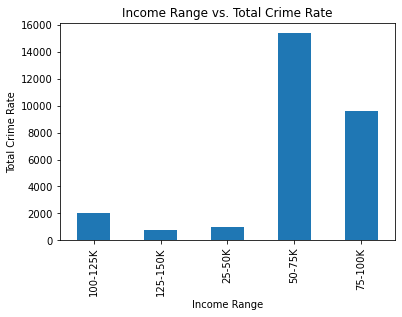

In [5]:
#Removed outlier
sorted_df = outliers_removed_df.sort_values("Average_Income")
df = sorted_df.groupby('Income Group')['Total Average Rate'].sum()
df.plot(kind='bar', x='Income Group', y='Total Average Rate')
plt.title("Income Range vs. Total Crime Rate")
plt.xlabel("Income Range")
plt.ylabel("Total Crime Rate")
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

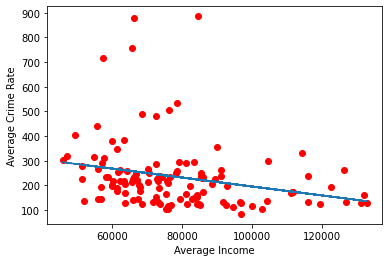

-0.257140955516672
0.0040897317614533675


In [6]:
## Creat linear regression plots 

income = outliers_removed_df["Average_Income"]
crime = outliers_removed_df["Total Average Rate"]

#plot
slope, int, r, p, std_err = st.linregress(income, crime)

#Create equation of line
eq_line = slope * income + int

plt.scatter(income, crime, color= 'red', label = 'actual data')
plt.plot(income, eq_line, '--')
plt.xlabel("Average Income")
plt.ylabel("Average Crime Rate")
plt.show()

print(r)
print(p)

## Crime and Income Analysis

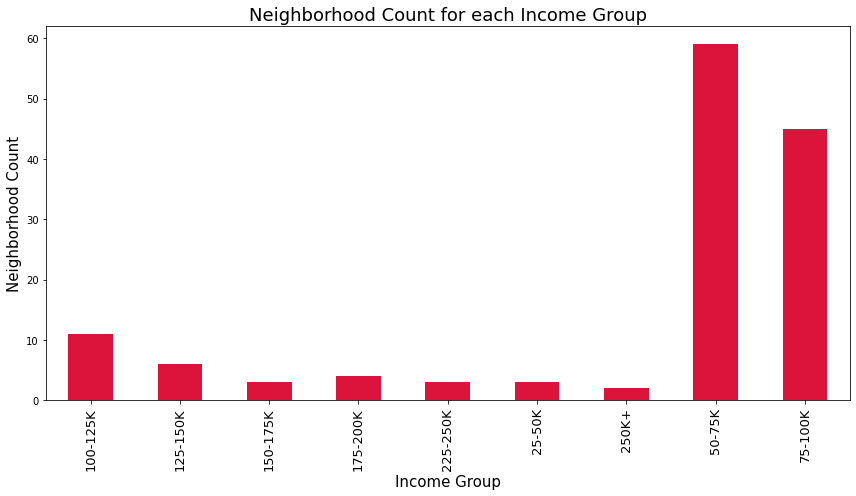

In [7]:
#Sort the data on Income
sorted_df = final_df.sort_values("Average_Income", ascending = True)

#Count Neighborhoods for each Income group and append it to our dataframe
count_neighborhood_df = sorted_df.groupby(["Income Group"])["Neighbourhood"].count().replace(0,np.nan).dropna().astype(int)

#Plot the bar graph showing count of neighborhoods for each Income Range
count_neighborhood_df.plot(kind ='bar',color = 'crimson',figsize=(12,7))

# Set labels for axes
plt.xticks(rotation=90,fontsize = 13)
plt.xlabel("Income Group",fontsize = 15)
plt.ylabel("Neighborhood Count",fontsize = 15)
plt.title("Neighborhood Count for each Income Group",fontsize = 18)

#Display resulting plot
plt.tight_layout()
plt.show()

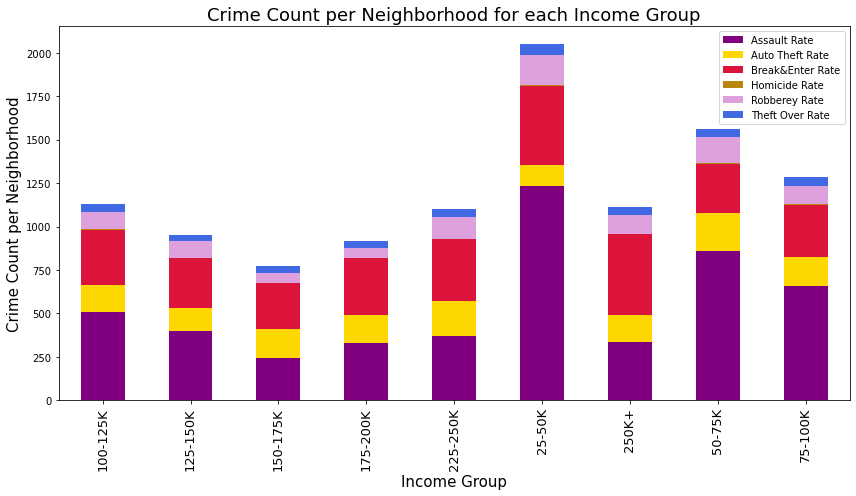

In [8]:
#Fetch sum of each crime type for each Income Range
grouped_df =final_df.groupby(["Income Group"]).agg(
    {
         'Assault Rate':sum,    
         'Auto Theft Rate': sum,  
         'Break&Enter Rate': sum , 
        'Homicide Rate': sum,
        'Robberey Rate': sum,
        'Theft Over Rate': sum
    }
)

# Count Neighborhoods for each Income group and append it to our dataframe
count_neighborhood_df = final_df.groupby(["Income Group"]).count()["Neighbourhood"] 
grouped_df["Count_Neighborhood"] = count_neighborhood_df

#Drop row if it has NaN values for all columns
grouped_df=grouped_df.replace(0,np.nan).dropna(thresh=6).fillna(0)

#Divide each crime rate with Neighborhood count so as to find values per neighborhood
grouped_df["Assault Rate"] = (grouped_df["Assault Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Auto Theft Rate"] = (grouped_df["Auto Theft Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Break&Enter Rate"] = (grouped_df["Break&Enter Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Homicide Rate"] = (grouped_df["Homicide Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Robberey Rate"] = (grouped_df["Robberey Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Theft Over Rate"] = (grouped_df["Theft Over Rate"])/(grouped_df["Count_Neighborhood"])

#Plot the bar graph showing crime count per neighborhood for each Income Range
grouped_df = grouped_df[["Assault Rate","Auto Theft Rate","Break&Enter Rate","Homicide Rate","Robberey Rate","Theft Over Rate"]]
colors = ['purple','gold','crimson','darkgoldenrod','plum','royalblue']
grouped_df.plot(kind ='bar', stacked = True,color = colors,figsize=(12,7))

# Set labels for axes
plt.xticks(rotation=90,fontsize = 13)
plt.xlabel("Income Group",fontsize = 15)
plt.ylabel("Crime Count per Neighborhood",fontsize = 15)
plt.title("Crime Count per Neighborhood for each Income Group",fontsize = 18)

#Display resulting plot
plt.tight_layout()
plt.show()

## Red Light Cameras Analysis

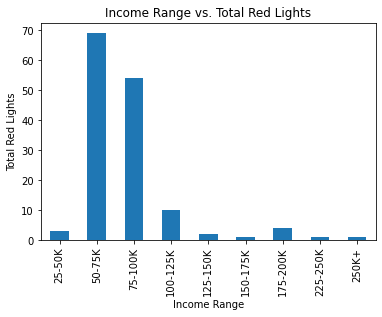

In [9]:
#display income & red lights plot
sorted_df = final_df.sort_values("Average_Income")
df1 = sorted_df.groupby('Income Group', sort=False)['Number of Red Lights'].sum()
df1.plot(kind='bar', x='Income Group', y='Number of Red Lights')
plt.title("Income Range vs. Total Red Lights")
plt.xlabel("Income Range")
plt.ylabel("Total Red Lights")
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

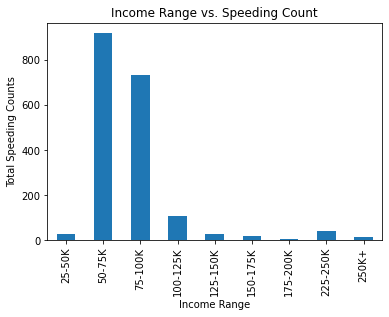

In [10]:
#display income & speeding plot
df2 = sorted_df.groupby('Income Group', sort = False)['Speeding'].sum()
df2.plot(kind='bar', x='Income Group', y='Speeding Count')
plt.title("Income Range vs. Speeding Count")
plt.xlabel("Income Range")
plt.ylabel("Total Speeding Counts")
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

## Starbucks Locations Analysis

In [11]:
# Create a function to calculate regression values and creat linear regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, annotate_point):
    
    mask = ~np.isnan(x_values) & ~np.isnan(y_values)
    slope, intercept, r, p, std_err = st.linregress(x_values[mask], y_values[mask])
    
    # Regression values
    regression_values = slope * x_values + intercept
    
    # Create a equation of line    
    eq_line = f"{round(slope, 2)}x + {round(intercept, 2)}"

    # Create a plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='green', alpha=0.5)
    
    plt.plot(x_values, regression_values, color='green')
    plt.annotate(eq_line, annotate_point, color='green', fontsize=16)
    
    plt.title(f'{y_label} vs. {x_label}', fontsize=15)
    plt.xlabel(f'{x_label}', fontsize=12)
    plt.ylabel(f'{y_label}', fontsize=12)
               
    plt.grid()

    # Display the figures
    plt.show()
    
    print(f'The correlation coefficient is {round(r, 5)}.')
    print(f'p value is {round(p, 5)}.')
    print(f'r square value is {round(r**2, 5)}.')

In [12]:
# final_df variables (did not exclude outliers)

final_avg_income = final_df['Average_Income']
final_med_income = final_df['Median_Income']
final_sb = final_df['Number of Starbucks Stores']
final_crime = final_df['Total Average Rate']
final_home_prices = final_df['Home Prices']
final_population = final_df['Population, 2016']
final_red_lights = final_df['Number of Red Lights']
final_speeding = final_df['Speeding']

starbucks_label = 'Total Number of Starbucks Stores'
avg_income_label = 'Average Income'
med_income_label = 'Median Income'
home_prices_label = 'House Prices'
population_label = 'Population'
crime_label = 'Total Average Crime Rate'
red_lights_label = 'Total Red Lights'
speeding_label = 'Total Spedding Counts'

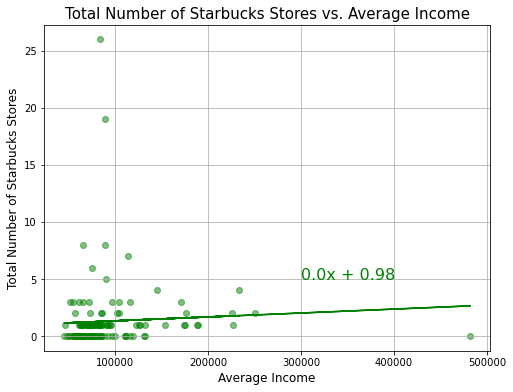

The correlation coefficient is 0.0584.
p value is 0.49946.
r square value is 0.00341.


In [13]:
# final_df - average income vs. starbucks stores

linear_regression_plot(final_avg_income, final_sb, avg_income_label, starbucks_label, (300000, 5))

## House Prices and Crime Rates

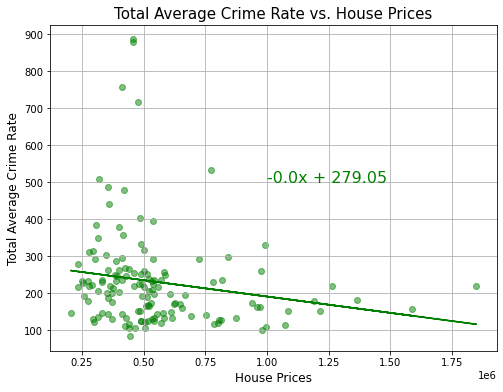

The correlation coefficient is -0.17803.
p value is 0.03601.
r square value is 0.03169.


In [14]:
linear_regression_plot(final_home_prices, final_crime, home_prices_label, crime_label, (1000000, 500))